In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

import warnings
warnings.simplefilter(action='ignore')

# 定義函數以便執行肩並肩的列印
def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print (adjoin(space, *reprs))
    print()
    return

# MetaData

In [2]:
# binary
meta_data = pd.read_csv('metadata\diabetes_binary_health_indicators_BRFSS2015.csv')
meta_data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
meta_data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [4]:
meta_data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## 繪製
* 條型圖(for category data)：
  * Diabetes_binary
  * HighBP
  * HighChol
  * CholCheck
  * Smoker
  * Stroke
  *	HeartDiseaseorAttack
  * PhysActivity
  *	Fruits
  * Veggies
  * HvyAlcoholConsump
  * AnyHealthcare
  * NoDocbcCost
  * DiffWalk
  * Sex

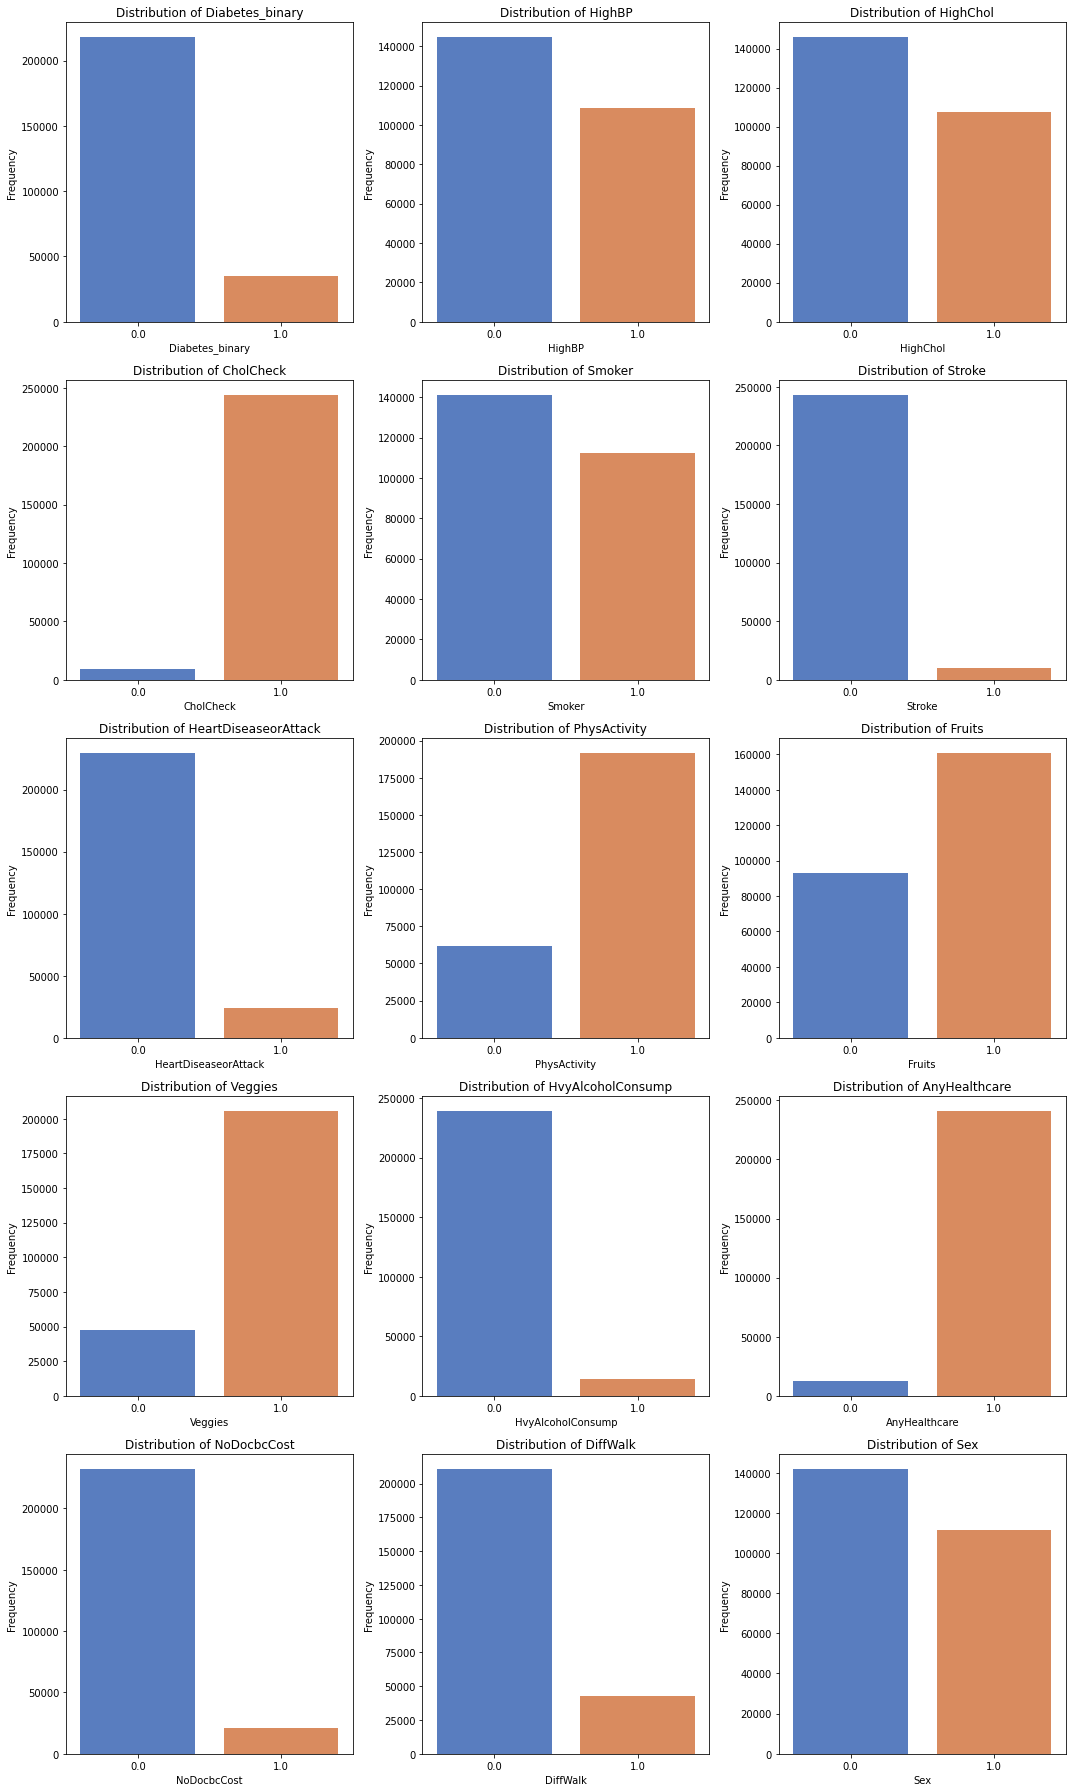

In [21]:
# 包含所有 category data 名稱的列表
category_columns = meta_data.columns.drop(['BMI', 'MentHlth', 'PhysHlth', 'Income', 'Education', 'Age', 'GenHlth'])

# 設置子圖的行數和列數
n_cols = 3
n_rows = (len(category_columns) + n_cols - 1) // n_cols

# 創建子圖
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# 遍歷每個column並繪製條形圖
for i, column in enumerate(category_columns):
    sns.countplot(x=column, data=meta_data, ax=axes[i], palette="bright")
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# After Normalization 1 - binary data

被正規化的特徵有：
* BMI
* MentHlth
* PhysHlth
* Income
* Education
* Age
* GenHlth

In [6]:
# binary
norm_binary_data = pd.read_csv('step_preprocessing\data_binary_after_preprocessing.csv', index_col=False)
norm_binary_data = norm_binary_data.drop(norm_binary_data.columns[0], axis=1)
norm_binary_data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Age,Education,Income,BMI_afterNormalization,MentHlth_afterNormalization,PhysHlth_afterNormalization,Income_afterNormalization,Education_afterNormalization,Age_afterNormalization,GenHlth_afterNormalization
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,9.0,4.0,3.0,1.757936,1.998592,1.233999,-1.474487,-1.065595,0.316900,2.329121
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,7.0,6.0,1.0,-0.511806,-0.429630,-0.486592,-2.440138,0.963272,-0.337933,0.457294
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,9.0,4.0,8.0,-0.057858,3.617407,2.954590,0.939638,-1.065595,0.316900,2.329121
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,11.0,3.0,6.0,-0.209174,-0.429630,-0.486592,-0.026012,-2.080028,0.971733,-0.478619
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,11.0,5.0,4.0,-0.663122,-0.024926,-0.486592,-0.991662,-0.051162,0.971733,-0.478619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,5.0,6.0,7.0,2.514516,-0.429630,0.086938,0.456813,0.963272,-0.992766,0.457294
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,11.0,2.0,4.0,-1.571019,-0.429630,-0.486592,-0.991662,-3.094461,0.971733,1.393207
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,2.0,5.0,2.0,-0.057858,-0.429630,-0.486592,-1.957312,-0.051162,-1.975015,-1.414532
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,7.0,5.0,1.0,-0.814438,-0.429630,-0.486592,-2.440138,-0.051162,-0.337933,0.457294


In [7]:
norm_binary_data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'BMI_afterNormalization', 'MentHlth_afterNormalization',
       'PhysHlth_afterNormalization', 'Income_afterNormalization',
       'Education_afterNormalization', 'Age_afterNormalization',
       'GenHlth_afterNormalization'],
      dtype='object')

In [8]:
norm_binary_data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Age,Education,Income,BMI_afterNormalization,MentHlth_afterNormalization,PhysHlth_afterNormalization,Income_afterNormalization,Education_afterNormalization,Age_afterNormalization,GenHlth_afterNormalization
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,8.032119,5.050434,6.053875,-2.471550e-16,1.478897e-17,1.205525e-16,2.151123e-17,-6.722259e-17,5.646697e-17,1.478897e-16
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,3.054220,0.985774,2.071148,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,-2.478916e+00,-4.296296e-01,-4.865924e-01,-2.440138e+00,-4.108894e+00,-2.302431e+00,-1.414532e+00
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,6.000000,4.000000,5.000000,-6.631223e-01,-4.296296e-01,-4.865924e-01,-5.088373e-01,-1.065595e+00,-6.653492e-01,-4.786188e-01
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,8.000000,5.000000,7.000000,-2.091739e-01,-4.296296e-01,-4.865924e-01,4.568129e-01,-5.116153e-02,-1.051636e-02,-4.786188e-01
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,10.000000,6.000000,8.000000,3.960906e-01,-1.598272e-01,-1.424742e-01,9.396380e-01,9.632716e-01,6.443165e-01,4.572943e-01
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,13.000000,6.000000,8.000000,1.053427e+01,3.617407e+00,2.954590e+00,9.396380e-01,9.632716e-01,1.626566e+00,2.329121e+00


## 繪製
* **條型圖(for category data)：**
  * Diabetes_binary
  * HighBP
  * HighChol
  * CholCheck
  * Smoker
  * Stroke
  *	HeartDiseaseorAttack
  * PhysActivity
  *	Fruits
  * Veggies
  * HvyAlcoholConsump
  * AnyHealthcare
  * NoDocbcCost
  * DiffWalk
  * Sex

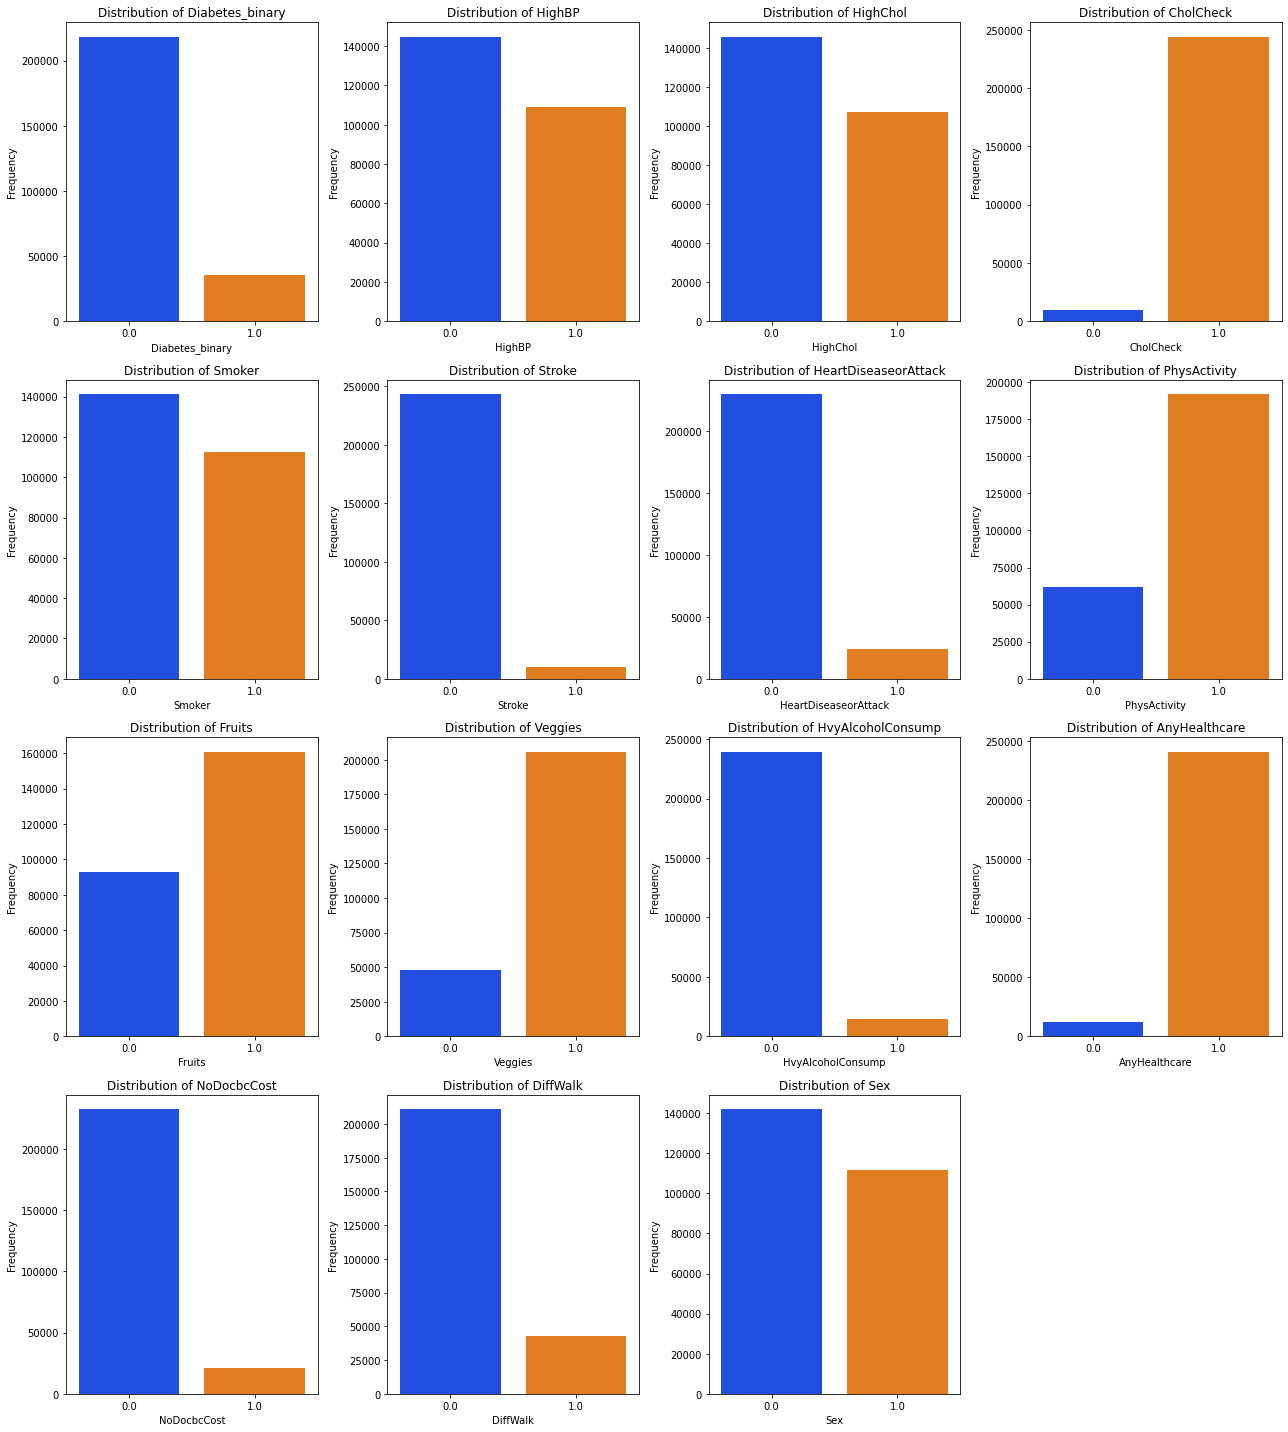

In [66]:
# 包含所有 category data 名稱的列表
category_columns = norm_binary_data.columns.drop(['BMI', 'MentHlth', 'PhysHlth', 'Income', 'Education', 'Age', 'GenHlth', 
                                                  'BMI_afterNormalization', 'MentHlth_afterNormalization', 
                                                  'PhysHlth_afterNormalization', 'Income_afterNormalization', 
                                                  'Education_afterNormalization', 'Age_afterNormalization', 
                                                  'GenHlth_afterNormalization'])

# 設置子圖的行數和列數
n_cols = 4
n_rows = (len(category_columns) + n_cols - 1) // n_cols

# 創建子圖
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# 遍歷每個column並繪製條形圖
for i, column in enumerate(category_columns):
    sns.countplot(x=column, data=norm_binary_data, ax=axes[i], palette="bright")
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# 删除多的子圖
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

* **幾個不是binary(0, 1)的分類型資料**：
    * Income
    * Education
    * Age
    * GenHlth

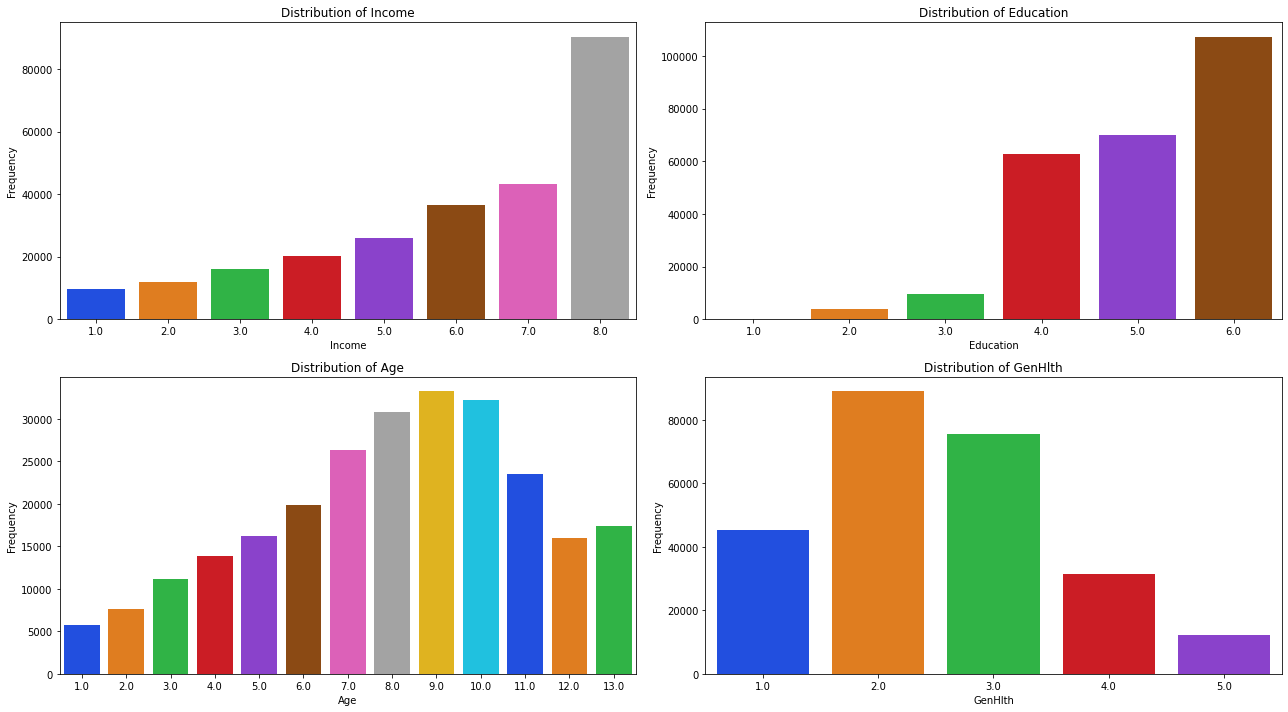

In [87]:
# 不是binary(0, 1)的分類型資料的列表
category_nonbinary_columns = ['Income', 'Education', 'Age', 'GenHlth']

# 設置子圖的行數和列數
n_cols = 2
n_rows = (len(category_nonbinary_columns) + n_cols - 1) // n_cols

# 創建子圖
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# 遍歷每個column並繪製條形圖
for i, column in enumerate(category_nonbinary_columns):
    sns.countplot(x=column, data=norm_binary_data, ax=axes[i], palette="bright")
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# 删除多的子圖
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

* **幾個不是binary(0, 1)的分類型資料(資料筆數>15)：**
    * MentHlth
    * PhysHlth

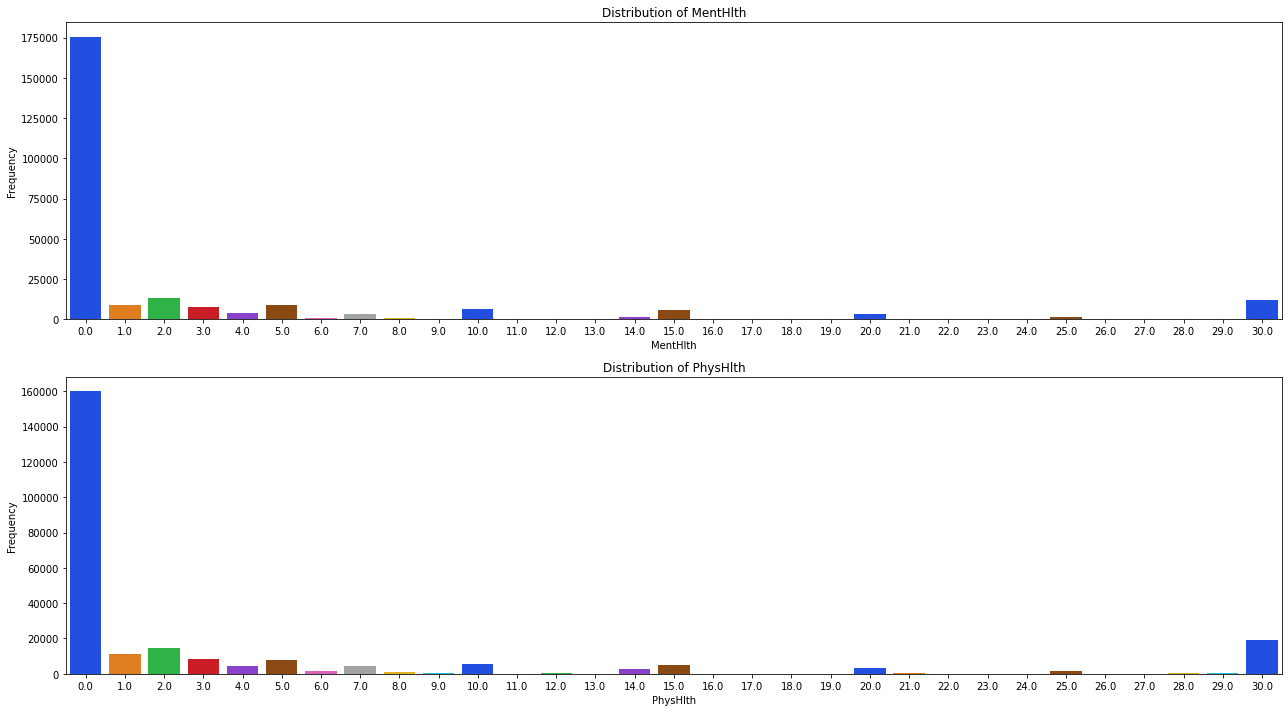

In [111]:
# 不是binary(0, 1)的分類型資料的列表
category_nonbinary_columns = ['MentHlth', 'PhysHlth']

# 設置子圖的行數和列數
n_cols = 1
n_rows = (len(category_nonbinary_columns) + n_cols - 1) // n_cols

# 創建子圖
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# 遍歷每個column並繪製條形圖
for i, column in enumerate(category_nonbinary_columns):
    sns.countplot(x=column, data=norm_binary_data, ax=axes[i], palette="bright")
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# 删除多的子圖
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

* **直方圖：**
    * 分為<b>正規化前</b>與<b>正規化後</b>
    * 特徵：
        * BMI

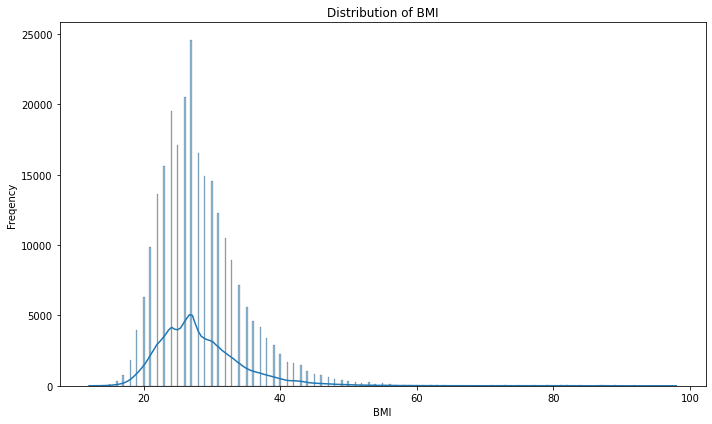

In [117]:
# 正規化前
# BMI 的 histogram
fig, ax = plt.subplots(figsize=(10, 6))

# 繪製
sns.histplot(norm_binary_data['BMI'], kde=True, ax=ax)
ax.set_title(f'Distribution of BMI')
ax.set_xlabel('BMI')
ax.set_ylabel('Freqency')

plt.tight_layout()
plt.show()

* **圓餅圖：**
    * 特徵：
        * MentHlth
        * PhysHlth

* **箱型圖：**
    * 分為<b>正規化前</b>與<b>正規化後</b>
    * 特徵：
        * BMI
        * MentHlth
        * PhysHlth
        * Income
        * Education
        * Age
        * GenHlth

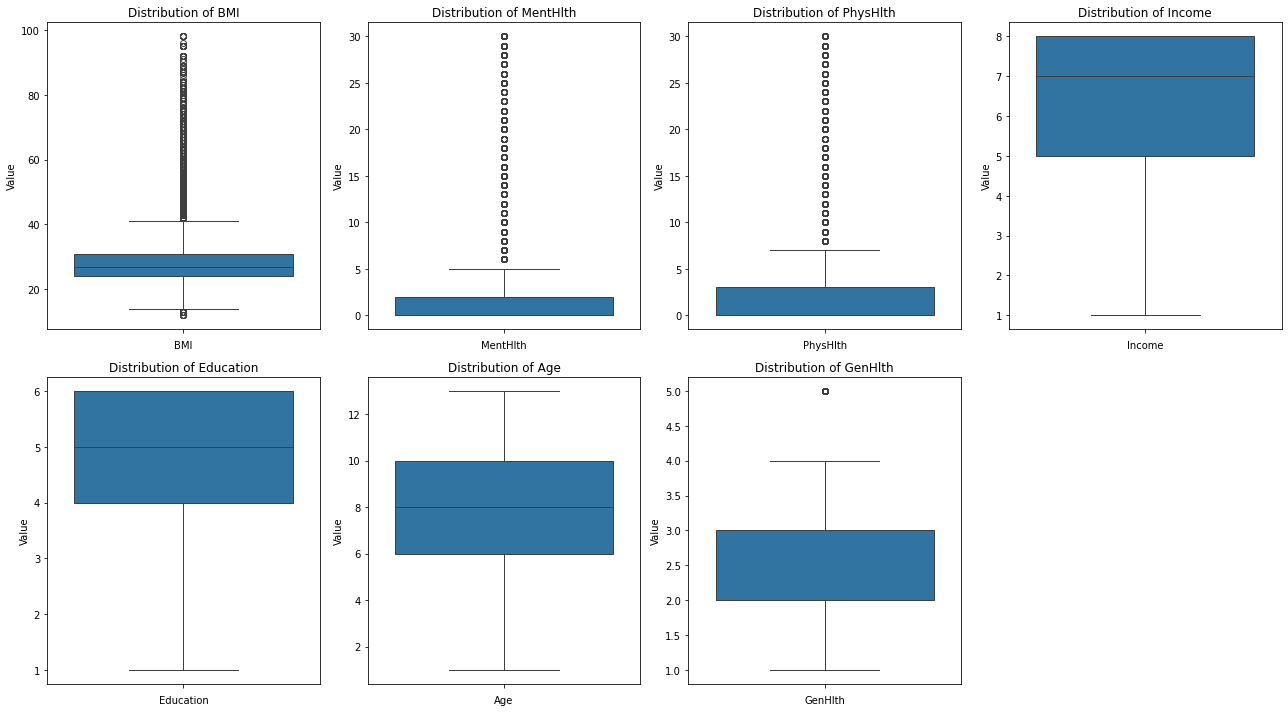

In [81]:
# 正規化前
# 設置子圖的行數和列數
n_cols = 4
n_rows = (len(beforeNorm_columns) + n_cols - 1) // n_cols

# 創建子圖
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# 遍歷每個column並繪製箱線圖
for i, column in enumerate(beforeNorm_columns):
    sns.boxplot(y=norm_binary_data[column], ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')

# 删除多餘的子圖
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* **熱力圖：**
    * 用來顯示變數之間的相關係數。
    * 透過下圖可知：
        * GenHlth 與 PhysHlth 具較高的正相關(0.52)。
        * DiffWalk 與 GenHlth、PhysHlth 具有較高的相關性(0.46、0.48)。
        * Education 與 Income 也具有較高的相關性(0.45)。
        * 與本實驗的目標 Diabetes_binary 較相關的則為 GenHlth (0.29)、HighBP(0.26)、BMI(0.22)、DiffWalk(0.22)。

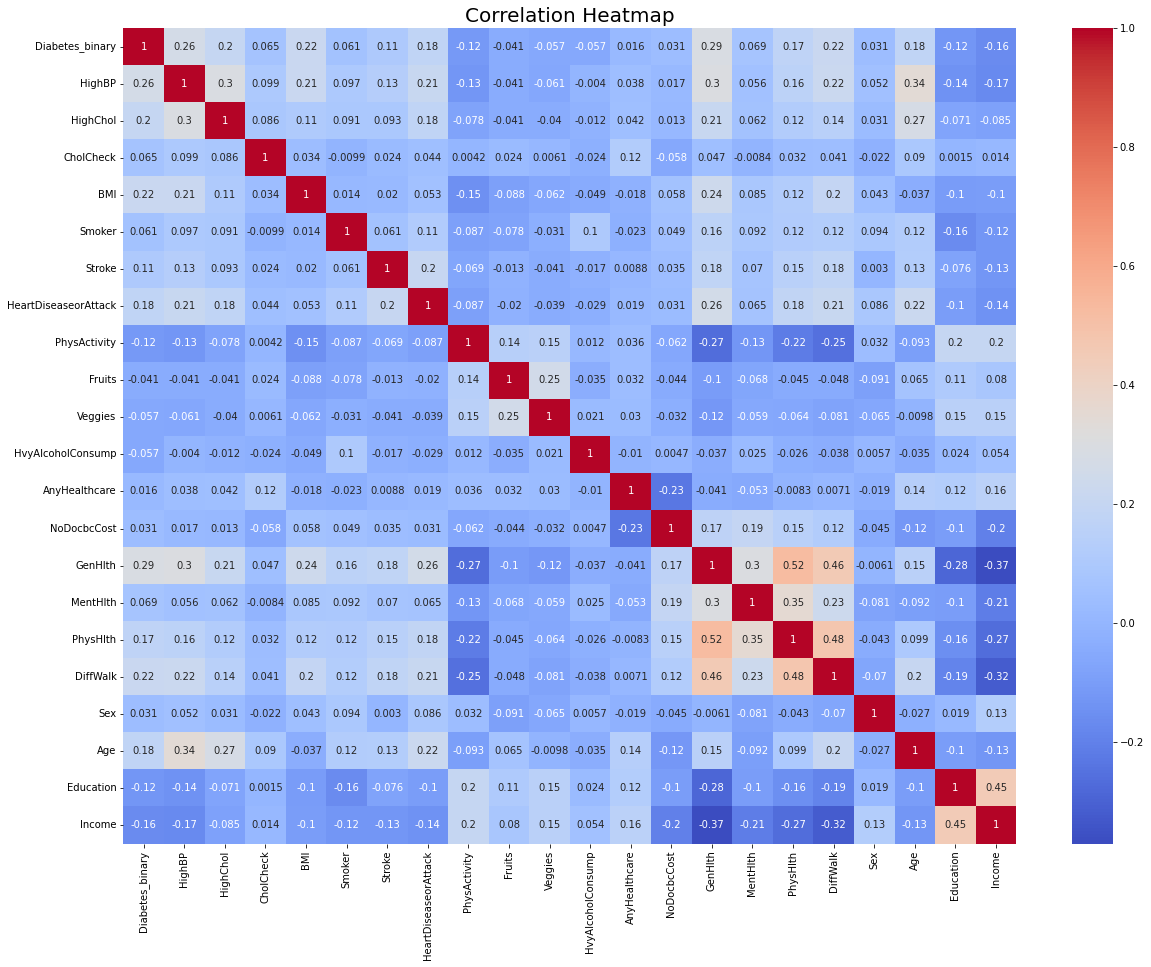

In [53]:
# 計算相關係數矩陣
corr_matrix = norm_binary_data.drop(norm_binary_data.columns[22:29], axis=1).corr()

plt.figure(figsize=(20, 15))

# 繪製熱力圖
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=20)
plt.show()